<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.2_descriptives/stats_descriptives_QQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Descriptive statistics
# QQ plots

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

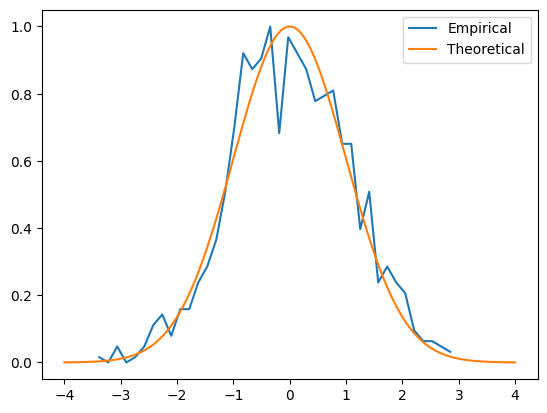

In [12]:
## generate data

n    = 1000
# variant1
data = np.random.randn(n)
# variant2
# data = np.exp( np.random.randn(n)*.8 ) # log-norm distribution

# theoretical normal distribution given N
x = np.linspace(-4,4,10001)
theonorm = stats.norm.pdf(x)
theonorm = theonorm/max(theonorm)

# plot histograms on top of each other
yy,xx = np.histogram(data,40)
yy = yy/max(yy)
xx = (xx[:-1]+xx[1:])/2

plt.plot(xx,yy,label='Empirical')
plt.plot(x,theonorm,label='Theoretical')
plt.legend()
plt.show()

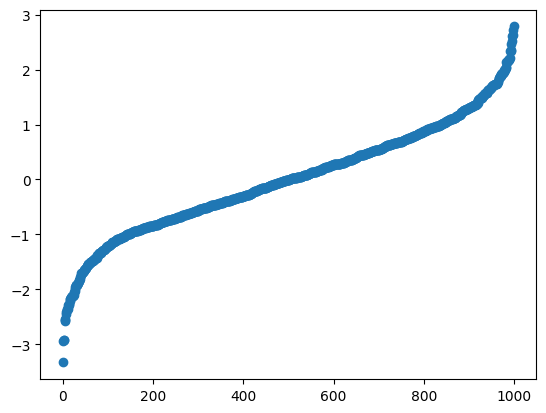

In [15]:
## create a QQ plot

zSortData  = np.sort(stats.zscore(data))
plt.plot(zSortData,'o')

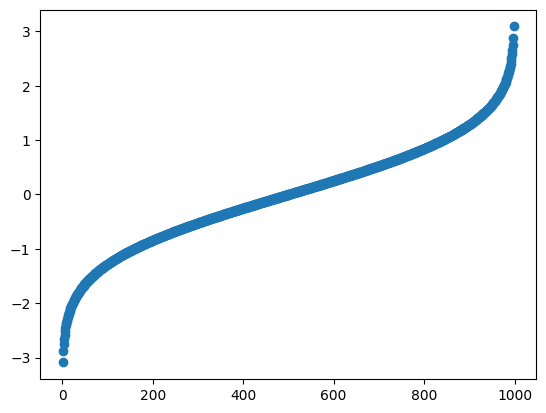

In [17]:
sortNormal = stats.norm.ppf(np.linspace(0,1,n))
plt.plot(sortNormal,'o')

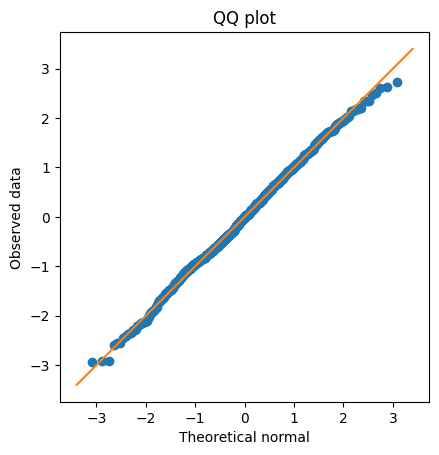

In [21]:
# QQ plot is theory vs reality
plt.plot(sortNormal,zSortData,'o')

# set axes to be equal
xL,xR = plt.xlim()
yL,yR = plt.ylim()
lims  = [ np.min([xL,xR,yL,yR]),np.max([xL,xR,yL,yR]) ]
plt.xlim(lims)
plt.ylim(lims)

# draw red comparison line
plt.plot(lims,lims)

plt.xlabel('Theoretical normal')
plt.ylabel('Observed data')
plt.title('QQ plot')
plt.axis('square')
plt.show()

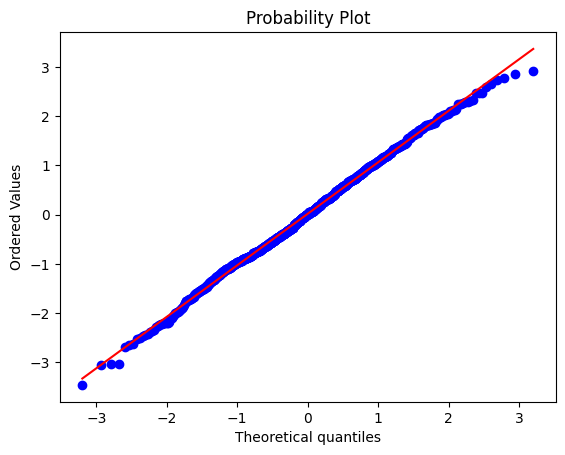

In [20]:
## Python solution

x = stats.probplot(data,plot=plt)
